#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the Dataset and Preprocessing

In [3]:
df = pd.read_csv('wine_data.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking the data types of each feature
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [5]:
#checking if there are null values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


The dataset has no null values.

#1. Most frequently occuring wine quality and the highest and lowest quality values

In [6]:
freq_value = df['quality'].value_counts().idxmax()
max_val = df['quality'].max()
min_val = df['quality'].min()
print('The most frequently occuring wine quality is: ', freq_value)
print('The highest quality value is: ', max_val)
print('The lowest quality value is: ', min_val)

The most frequently occuring wine quality is:  5
The highest quality value is:  8
The lowest quality value is:  3


**Analysis**

The most frequently occuring value of wine quality is 5.
The highest quality value is 8.
The lowest quality value is 3.

#2. How is fixed acidity correlated to the quality of the wine? How does the alcohol content affect the quality? How is the free Sulphur dioxide content correlated to the quality of the wine?

In [7]:
correlations = df[['fixed acidity', 'alcohol', 'free sulfur dioxide', 'quality']].corr()
print(correlations['quality'])

fixed acidity          0.124052
alcohol                0.476166
free sulfur dioxide   -0.050656
quality                1.000000
Name: quality, dtype: float64


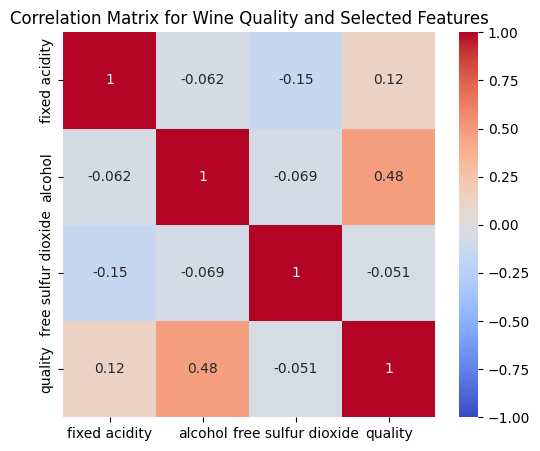

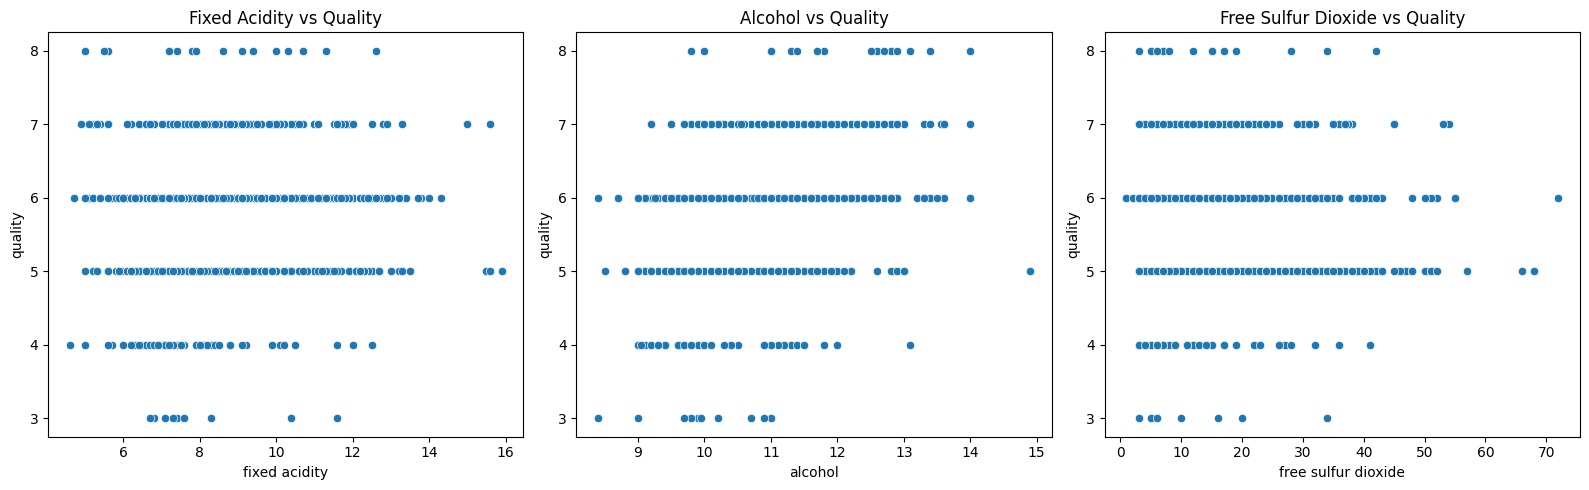

In [25]:
import seaborn as sns

cols = ['fixed acidity', 'alcohol', 'free sulfur dioxide', 'quality']

correlation_matrix = df[cols].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Wine Quality and Selected Features')
plt.show()

print()

# Scatter plots to visualize relationships
plt.figure(figsize=(16, 5))

# Scatter plot for Fixed Acidity vs Quality
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='fixed acidity', y='quality')
plt.title('Fixed Acidity vs Quality')

# Scatter plot for Alcohol vs Quality
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='alcohol', y='quality')
plt.title('Alcohol vs Quality')

# Scatter plot for Free Sulfur Dioxide vs Quality
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='free sulfur dioxide', y='quality')
plt.title('Free Sulfur Dioxide vs Quality')

plt.tight_layout()
plt.show()


**Analysis**

The correlation between Fixed Acidity and Quality is 0.12. This indicates a positive, but very weak correlation between these two features, suggesting that the Fixed Acidity does not have a strong impact on the overall wine quality.

The correlation between Alcohol and Quality is 0.48, indicating that the alcohol content in a wine has a substantial positive effect on the quality. An increase in the alcohol level can lead to an increase in the quality.

The correlation between Free Sulphur Dioxide and Quality is -0.051, which shows a negative relationship between the two feature. The Free Sulphur Dioxide content in a wine adversely affects its quality.

Thus, a wine should have more amount of alcohol and acidity and less free sulphur dioxide.

#3. Average residual sugar for the best quality wine and the lowest quality wine in the dataset.

In [9]:
# Find the highest and lowest wine quality in the dataset
best_quality = df['quality'].max()
lowest_quality = df['quality'].min()

# Calculate average residual sugar for best and lowest quality wines
average_residual_sugar_best = df[df['quality'] == best_quality]['residual sugar'].mean()
average_residual_sugar_lowest = df[df['quality'] == lowest_quality]['residual sugar'].mean()

print(f"Average residual sugar for best quality wine (quality {best_quality}): {average_residual_sugar_best}")
print(f"Average residual sugar for lowest quality wine (quality {lowest_quality}): {average_residual_sugar_lowest}")


Average residual sugar for best quality wine (quality 8): 2.5777777777777775
Average residual sugar for lowest quality wine (quality 3): 2.6350000000000002


**Analysis**

The difference between the residual sugar levels in the best and lowest quality wine is negligible. Thus, one might say that the Residual Sugar feature has a minimal impact on the quality.

However, the slight difference between the average level suggests that good quality wines have lesser sugar than the lower quality ones.

#4. Correlation between Volatile Acidity and Quality of the wine


Correlation between volatile acidity and quality: -0.390557780264007


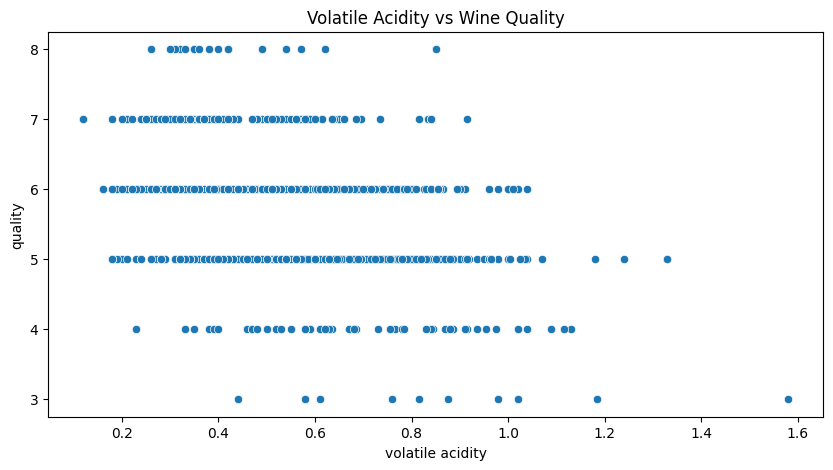

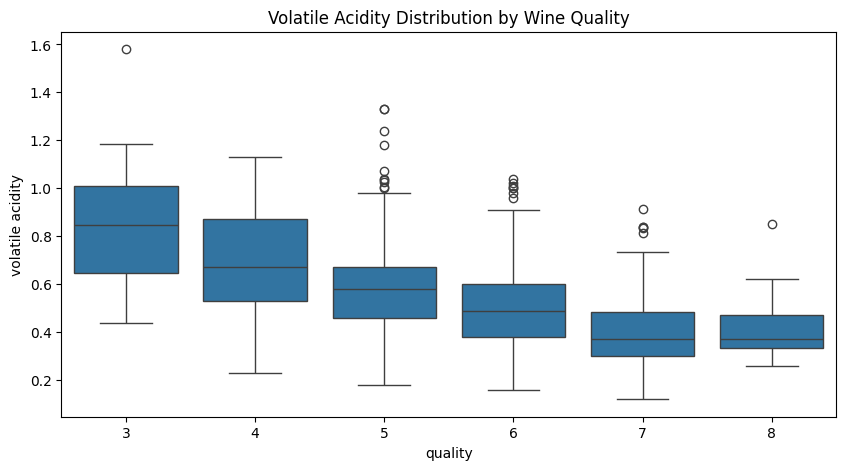

In [26]:
# Correlation
correlation = df['volatile acidity'].corr(df['quality'])
print()
print(f"Correlation between volatile acidity and quality: {correlation}")

# Scatter plot to visualize relationship
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='volatile acidity', y='quality')
plt.title('Volatile Acidity vs Wine Quality')
plt.show()

print()
print()

# Box plot to examine volatile acidity distribution across quality levels
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='quality', y='volatile acidity')
plt.title('Volatile Acidity Distribution by Wine Quality')
plt.show()


**Analysis**

The correlation between Volatile Acidity and Wine quality is -0.3905. This shows a moderate negative correlation, that implies an adverse effect the volatile acidity has over the quality.

Thus, it is necessary for wine makers to ensure that they maintain low levels of volatile acidity, to create high quality wines.

#5. Training a Decision Tree Model

Separating the independent and dependent features

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Splitting the Dataset into Train and Test Set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training the model

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Comparing the predicted values and original values

In [15]:
y_pred = dt.predict(X_test)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[5 5 7 5 5 6 5 6 4 5 5 5 6 4 7 6 7 4 5 4 7 6 6 4 5 5 5 6 5 6 6 6 6 5 7 7 6
 3 7 6 5 6 6 7 6 5 6 6 5 6 5 5 6 6 6 5 5 5 7 6 5 7 6 6 5 6 5 5 6 6 6 6 5 6
 6 6 5 5 5 7 6 5 6 7 6 6 4 5 5 5 5 6 6 6 5 6 6 5 5 5 7 6 6 6 5 5 5 3 6 5 6
 5 8 6 5 6 6 7 6 6 5 4 5 6 7 6 5 5 6 7 4 5 5 5 6 5 6 5 7 5 6 6 6 3 6 6 8 6
 5 5 6 5 3 5 6 6 4 6 6 6 6 5 7 4 5 5 6 6 6 6 6 4 4 7 6 7 6 7 7 5 5 8 6 6 7
 5 5 6 5 6 7 6 5 6 5 5 5 5 7 5 5 6 6 6 5 5 5 6 6 6 6 7 5 7 5 6 5 5 6 6 5 6
 6 5 6 6 6 6 5 5 5 7 6 5 6 6 5 6 7 6 5 5 5 4 6 5 6 5 5 6 5 5 6 5 6 5 5 4 5
 7 6 6 5 6 5 3 5 6 6 7 5 6 6 6 5 6 7 6 6 5 5 6 6 5 6 5 6 5 7 6 5 5 6 6 5 6
 5 6 5 5 6 5 6 5 6 6 5 5 6 5 7 6 5 5 5 6 7 5 5 6 5 6 6 7 6 4 7 5 5 4 7 6 5
 6 4 7 7 5 5 5 5 5 5 6 6 5 6 6 6 7 6 6 6 6 7 4 7 5 5 7 5 6 5 6 7 5 3 6 6 5
 7 5 5 6 5 5 5 7 6 6 6 6 4 6 6 6 7 5 6 5 6 5 5 7 4 5 7 7 5 5]
[[5 6]
 [5 5]
 [7 7]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [4 4]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [4 5]
 [7 6]
 [6 6]
 [7 7]
 [4 5]
 [5 5]
 [4 4]
 [7 7]
 [6 6]
 [6 6]
 [4 4]
 [5 6]
 [5 5]
 [5 5]

Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   1   1   0   0   0]
 [  1   3   6   3   1   0]
 [  3  11 109  39   7   0]
 [  2   4  35 110  19   0]
 [  0   1   4  12  20   3]
 [  0   0   0   1   4   0]]


Accuracy

In [17]:
accuracy_score(y_test, y_pred)

0.605

#6. Training a Random Forest Classifier Model

Separating the independent and dependent features

In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Splitting the Dataset into Train and Test Set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Scaling the Data

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Comparing the predicted values and original values

In [22]:
y_pred = rf.predict(X_test)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[6 5 7 5 5 6 5 6 5 5 5 5 6 7 5 7 7 5 5 5 6 5 6 6 6 5 5 6 5 6 6 6 6 6 7 7 5
 5 6 6 5 7 7 7 6 5 5 6 5 6 5 5 6 6 5 5 5 5 7 5 5 5 6 6 5 6 5 5 7 6 5 5 5 5
 6 6 5 5 5 7 6 5 6 6 6 5 5 5 5 5 5 6 6 5 7 5 6 5 5 5 7 7 6 7 6 5 6 6 6 5 6
 5 7 5 5 6 6 7 6 6 5 6 5 5 6 7 5 5 5 6 5 5 6 6 6 5 6 6 7 5 6 5 5 5 5 6 7 6
 5 5 5 5 6 5 6 6 6 5 6 7 5 6 7 5 5 5 6 6 6 6 6 6 5 7 5 6 7 7 7 5 5 6 6 6 6
 5 5 6 5 6 6 5 5 6 5 5 5 5 5 5 5 6 6 6 6 5 5 6 6 6 6 6 5 7 5 6 5 7 6 5 5 5
 6 6 6 6 6 6 6 6 5 6 5 6 7 6 6 7 7 6 5 6 5 5 6 5 5 5 5 5 5 5 5 6 5 6 5 5 5
 6 6 6 6 6 5 5 5 5 6 5 4 5 5 6 6 6 6 6 6 7 5 7 5 6 6 5 5 5 7 5 5 4 6 5 5 6
 6 6 5 5 6 5 6 5 6 6 5 5 5 5 5 6 5 5 5 6 6 7 5 7 5 5 7 7 6 5 7 6 5 5 7 5 5
 6 5 6 7 5 5 6 5 5 5 6 6 5 6 6 5 6 5 6 5 5 6 5 6 5 6 7 5 5 5 6 6 5 5 7 5 5
 6 5 5 6 5 5 5 6 6 6 6 6 5 5 5 6 5 6 6 6 6 5 5 7 6 6 5 5 5 5]
[[6 6]
 [5 5]
 [7 7]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 4]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [7 5]
 [5 6]
 [7 6]
 [7 7]
 [5 5]
 [5 5]
 [5 4]
 [6 7]
 [5 6]
 [6 6]
 [6 4]
 [6 6]
 [5 5]
 [5 5]

Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   2   0   0]
 [  0   0  10   4   0   0]
 [  0   0 136  29   4   0]
 [  0   2  45 108  15   0]
 [  0   0   3  15  22   0]
 [  0   0   0   1   4   0]]


Accuracy Score

In [24]:
accuracy_score(y_test, y_pred)

0.665

**Analysis**

Both models show moderate accuracy, with Random Forest performing better than Decision Tree.

Random Forest reduces overfitting by averaging multiple decision trees, which likely leads to better generalization and the slight improvement in accuracy.

The Random Forest's higher accuracy shows it is a better choice than Decision Tree for this dataset.

However, both the models have a scope for improvement.